# Введение


Разрабатываемое приложение представляет собой интеллектуальную информационную платформу для помощи врачам-неврологам при диагностике заболеваний, сопровождающихся тремором. Система предназначена для использования в условиях ограниченного доступа к специализированному диагностическому оборудованию.

**Цель системы**

Помочь врачам в диагностировании заболеваний данной категории.

**Целевая группа пользователей**
* Медицинские работники, ординаторы ведущие прием в амбулаториях небольших населенных пунктов;
* Студенты, обучающиеся в специализированных учебных заведениях.


# Функциональные требования

Экспертная система должна предоставлять следующие возможности:

*   Создание новой консультации
*   Внесение данных о пациенте
*   Получение результатов консультации

UseCase диаграмма будет выглядить следующим образом:


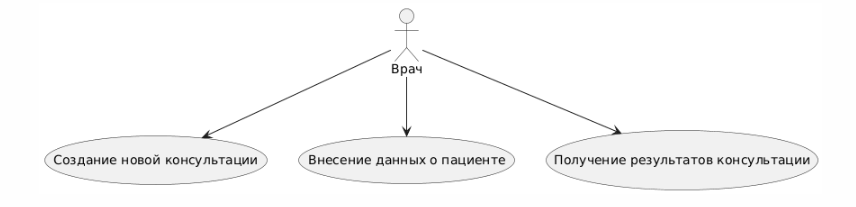

# Нефункциональные требования


* **Надежность**: Система должна обеспечивать корректное хранение и обработку данных с вероятностью отказа менее 10 случаев из 500 консультаций.

* **Производительность**: Время отклика системы при запросе результатов консультации или обработке клинической информации не должно превышать 2–3 секунды при одновременной работе до 50 пользователей.

* **Масштабируемость**: Система должна поддерживать до 100000 записей консультаций и 10 одновременных сессий без ухудшения времени отклика.

* **Безопасность**: Аутентификация и авторизация пользователей должны обеспечивать 100% контроль доступа.

* **Удобство использования**: Среднее время на одну консультацию не должно превышать 10 минут; уровень ошибок при вводе данных — менее 2% случаев.

* **Поддерживаемость**: Время внедрения изменений в базу знаний или исправления
критических ошибок не должно превышать 48 часов без остановки работы основной системы и 12 часов с остановкой.

* **Портативность**: Система должна корректно работать на стандартном ПК с минимальными требованиями: 4 ГБ оперативной памяти, 2-ядерный процессор, Windows 10 или Linux.

* **Доступность**: Система должна быть доступна онлайн с гарантией непрерывной работы не менее 90% времени за месяц.

# Архитектура

Локальная (автономная) архитектура, при которой все компоненты — база знаний, интерфейс и механизм вывода — размещаются на одном устройстве, имеет определённые преимущества, такие как независимость от сети и высокая скорость обработки данных. Однако такой подход оказывается ограниченным в условиях, когда система должна функционировать одновременно в нескольких медицинских учреждениях или обеспечивать регулярное обновление базы знаний. Отсутствие централизованного управления, необходимость вручную обновлять каждую копию приложения и ограниченные вычислительные ресурсы локальных устройств создают дополнительные сложности при сопровождении системы и выполнении ресурсоёмких операций, характерных для современных экспертных систем.

В отличие от этого, клиент‑серверная архитектура предоставляет более гибкое и масштабируемое решение, основанное на разделении функций между серверной и клиентской частями. Сервер обеспечивает централизованное хранение, обработку и управление данными, а клиент выступает в роли интерфейса для взаимодействия с пользователем. Такая модель позволяет централизованно обновлять базу знаний, обеспечивать резервное копирование и безопасность данных, а также выполнять ресурсоёмкие вычисления на серверной стороне, снижая нагрузку на клиентские устройства. Кроме того, клиент‑серверная архитектура обеспечивает возможность интеграции с другими системами и доступ к данным с различных устройств, что подтверждается успешным опытом внедрения многоуровневой распределённой информационной системы здравоохранения в Национальном университете Тайваня (NTUH) [1].

Таким образом, выбор клиент‑серверной архитектуры для экспертной системы по диагностике заболеваний с тремором является рациональным, так как она обеспечивает централизованное управление знаниями, надёжность, удобство сопровождения и масштабируемость для работы в многопользовательской среде медицинских учреждений [2].

## Выбор типа искуственного интелекта

Необходимо выбрать то, как будет реализован интелектуальный помошник.
На данный момент основными способами для постраения интелликутальных систем являются следующие решения:

*   Экспертные системы
*   Нейронные сети

Ниже представлена таблица сравнения данных подходов реализации системы [3]:


| Подход                                   | Суть                                                                                     | Преимущества                                               | Недостатки                                         |
| ---------------------------------------- | ---------------------------------------------------------------------------------------- | ---------------------------------------------------------- | ------------------------------------------------- |
| **Экспертные системы**                    | Используют формализованные знания (правила, факты, логические связи) для вывода решений | Объяснимость, прозрачность, возможность встраивания экспертных знаний | Трудоёмкость составления базы знаний, ограниченная обучаемость |
| **Нейронные сети** | Используют иерархические слои нейронов для анализа сложных данных                        | Могут обрабатывать изображения, сигналы и последовательности | Низкая интерпретируемость, требуют вычислительных ресурсов |




Нейронные сети имеют некоторые недостатки:
* Некорректных данные для обучения [4];
* Для обучения необходимо огромное количество данных (около 100 000 образцов) [5].



Ниже представлена диаграмма сравнения точности постановки диагнезов между нейронными сетями и экспертными системами [6]:

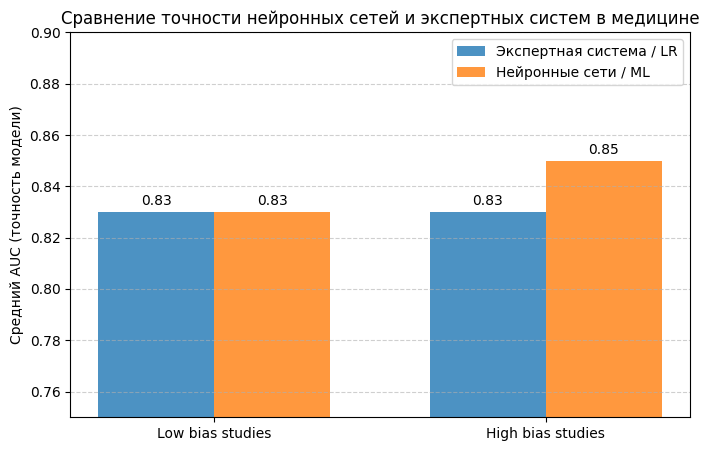

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из исследования (условные, но основаны на статье Christodoulou et al., 2019)
models = ["Low bias studies", "High bias studies"]
auc_lr = [0.83, 0.83]   # логистическая регрессия / экспертная система
auc_ml = [0.83, 0.85]   # машинное обучение / нейронки

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, auc_lr, width, label='Экспертная система / LR', alpha=0.8)
rects2 = ax.bar(x + width/2, auc_ml, width, label='Нейронные сети / ML', alpha=0.8)

# Подписи
ax.set_ylabel('Средний AUC (точность модели)')
ax.set_title('Сравнение точности нейронных сетей и экспертных систем в медицине')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Значения над столбцами
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.ylim(0.75, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


На основании всего вышесказанного можно заключить, что для задач медицинского консультирования и поддержки принятия решений более целесообразно использовать экспертную систему, так как в нашем случае присутсвует эксперт, к которому можно обратиться за помощью. Она не уступает в точности, по сравнению с нейронными сетями и не требует огромного количества датасетов, которые в свою очередь должны быть строго формализованны.

## Выбор клиентской части



Для реализации клиентской части экспертной системы диагностики заболеваний, сопровождающихся тремором, рассматривались два подхода: **десктопное клиентское приложение** и **веб-клиент**, оба работающие как интерфейс к серверной части, которая хранит и обрабатывает данные.
В результате было выбрано браузерное решение, так как оно является менее затратным с точки зрения производительности и более простым в разработке [7-8].  



## Вывод по выбору архитектуры

С учётом целей проекта, ограниченных ресурсов и необходимости централизованного управления знаниями, оптимальным решением является комбинация:

* Клиент-серверная архитектура - экономичность, простота сопровождения, централизованное управление базой знаний;

* Экспертная система - основа для приложения, отвечающая за принятие решения по консультации.

* Веб-клиент для клиентской части — универсальный доступ, простота обновления и масштабирования пользователей.

Такое архитектурное решение обеспечивает баланс между функциональностью, затратами и удобством сопровождения, позволяя эффективно развернуть экспертную систему в нескольких медицинских учреждениях.

# Выбор технологий разработки

При проектировании экспертной системы диагностики заболеваний, сопровождающихся тремором, ключевым этапом является обоснованный выбор технологий разработки. От архитектуры серверной и клиентской частей, языков программирования, платформ и инструментов зависит не только функциональность системы, но и её масштабируемость, надёжность, безопасность и удобство сопровождения.

## Серверная часть

Серверная часть экспертной системы выполняет ключевую роль в хранении, обработке и предоставлении данных и знаний. Для эффективной работы системы важно грамотно выбрать архитектурный подход, язык программирования, средства управления базами данных и инструменты интеграции

### Сравнение языков программирования



Для реализации серверной части экспертной системы диагностики заболеваний, сопровождающихся тремором, рассмотрены три языка программирования, которые используются чаще всего для написания серверной части приложения: **Java**, **Python** и **Go** [9]. Ниже приведено их сравнение[9]:





---
Сравнение времени вычислений для реализации алгоритма дерева решений:

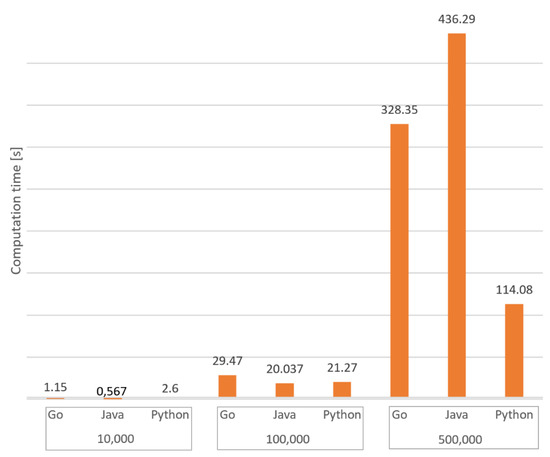

---
Сравнение использования оперативной памяти (в мегабайтах) при реализации алгоритма дерева решений:

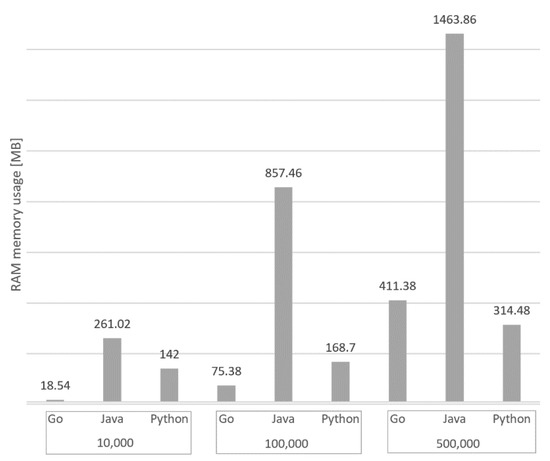

---
Сравнение загрузки ЦП (%) при реализации алгоритма дерева решений:

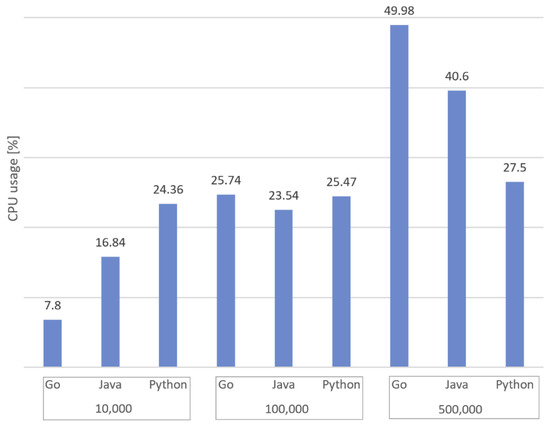

**Вывод**

С учётом требований к **производительности**, **масштабируемости** и **простоте разработки**,  
**Go** является оптимальным выбором для реализации серверной части экспертной системы.  
Его преимущества в том, что при тех нагрузках, которые необходимы для реализации системы, он показывает наибольшую производительность. Кроме того в команде разработки уже имеется опыт разработки на данном языке.


### Сравние технологий разработки для базы знаний

Лучшим способом для хранения базы знаний является графовое представление данных [10].

Возьмем самые популярные графовые СУБД:

* Neo4J;
* Janus Graph;
* Nebula Graph;
* Tiger Graph.
Сравнение выполнения времени запроса представлено ниже [11]:

---
Время выполнения всех запросов в минутах для каждой графовой базы данных

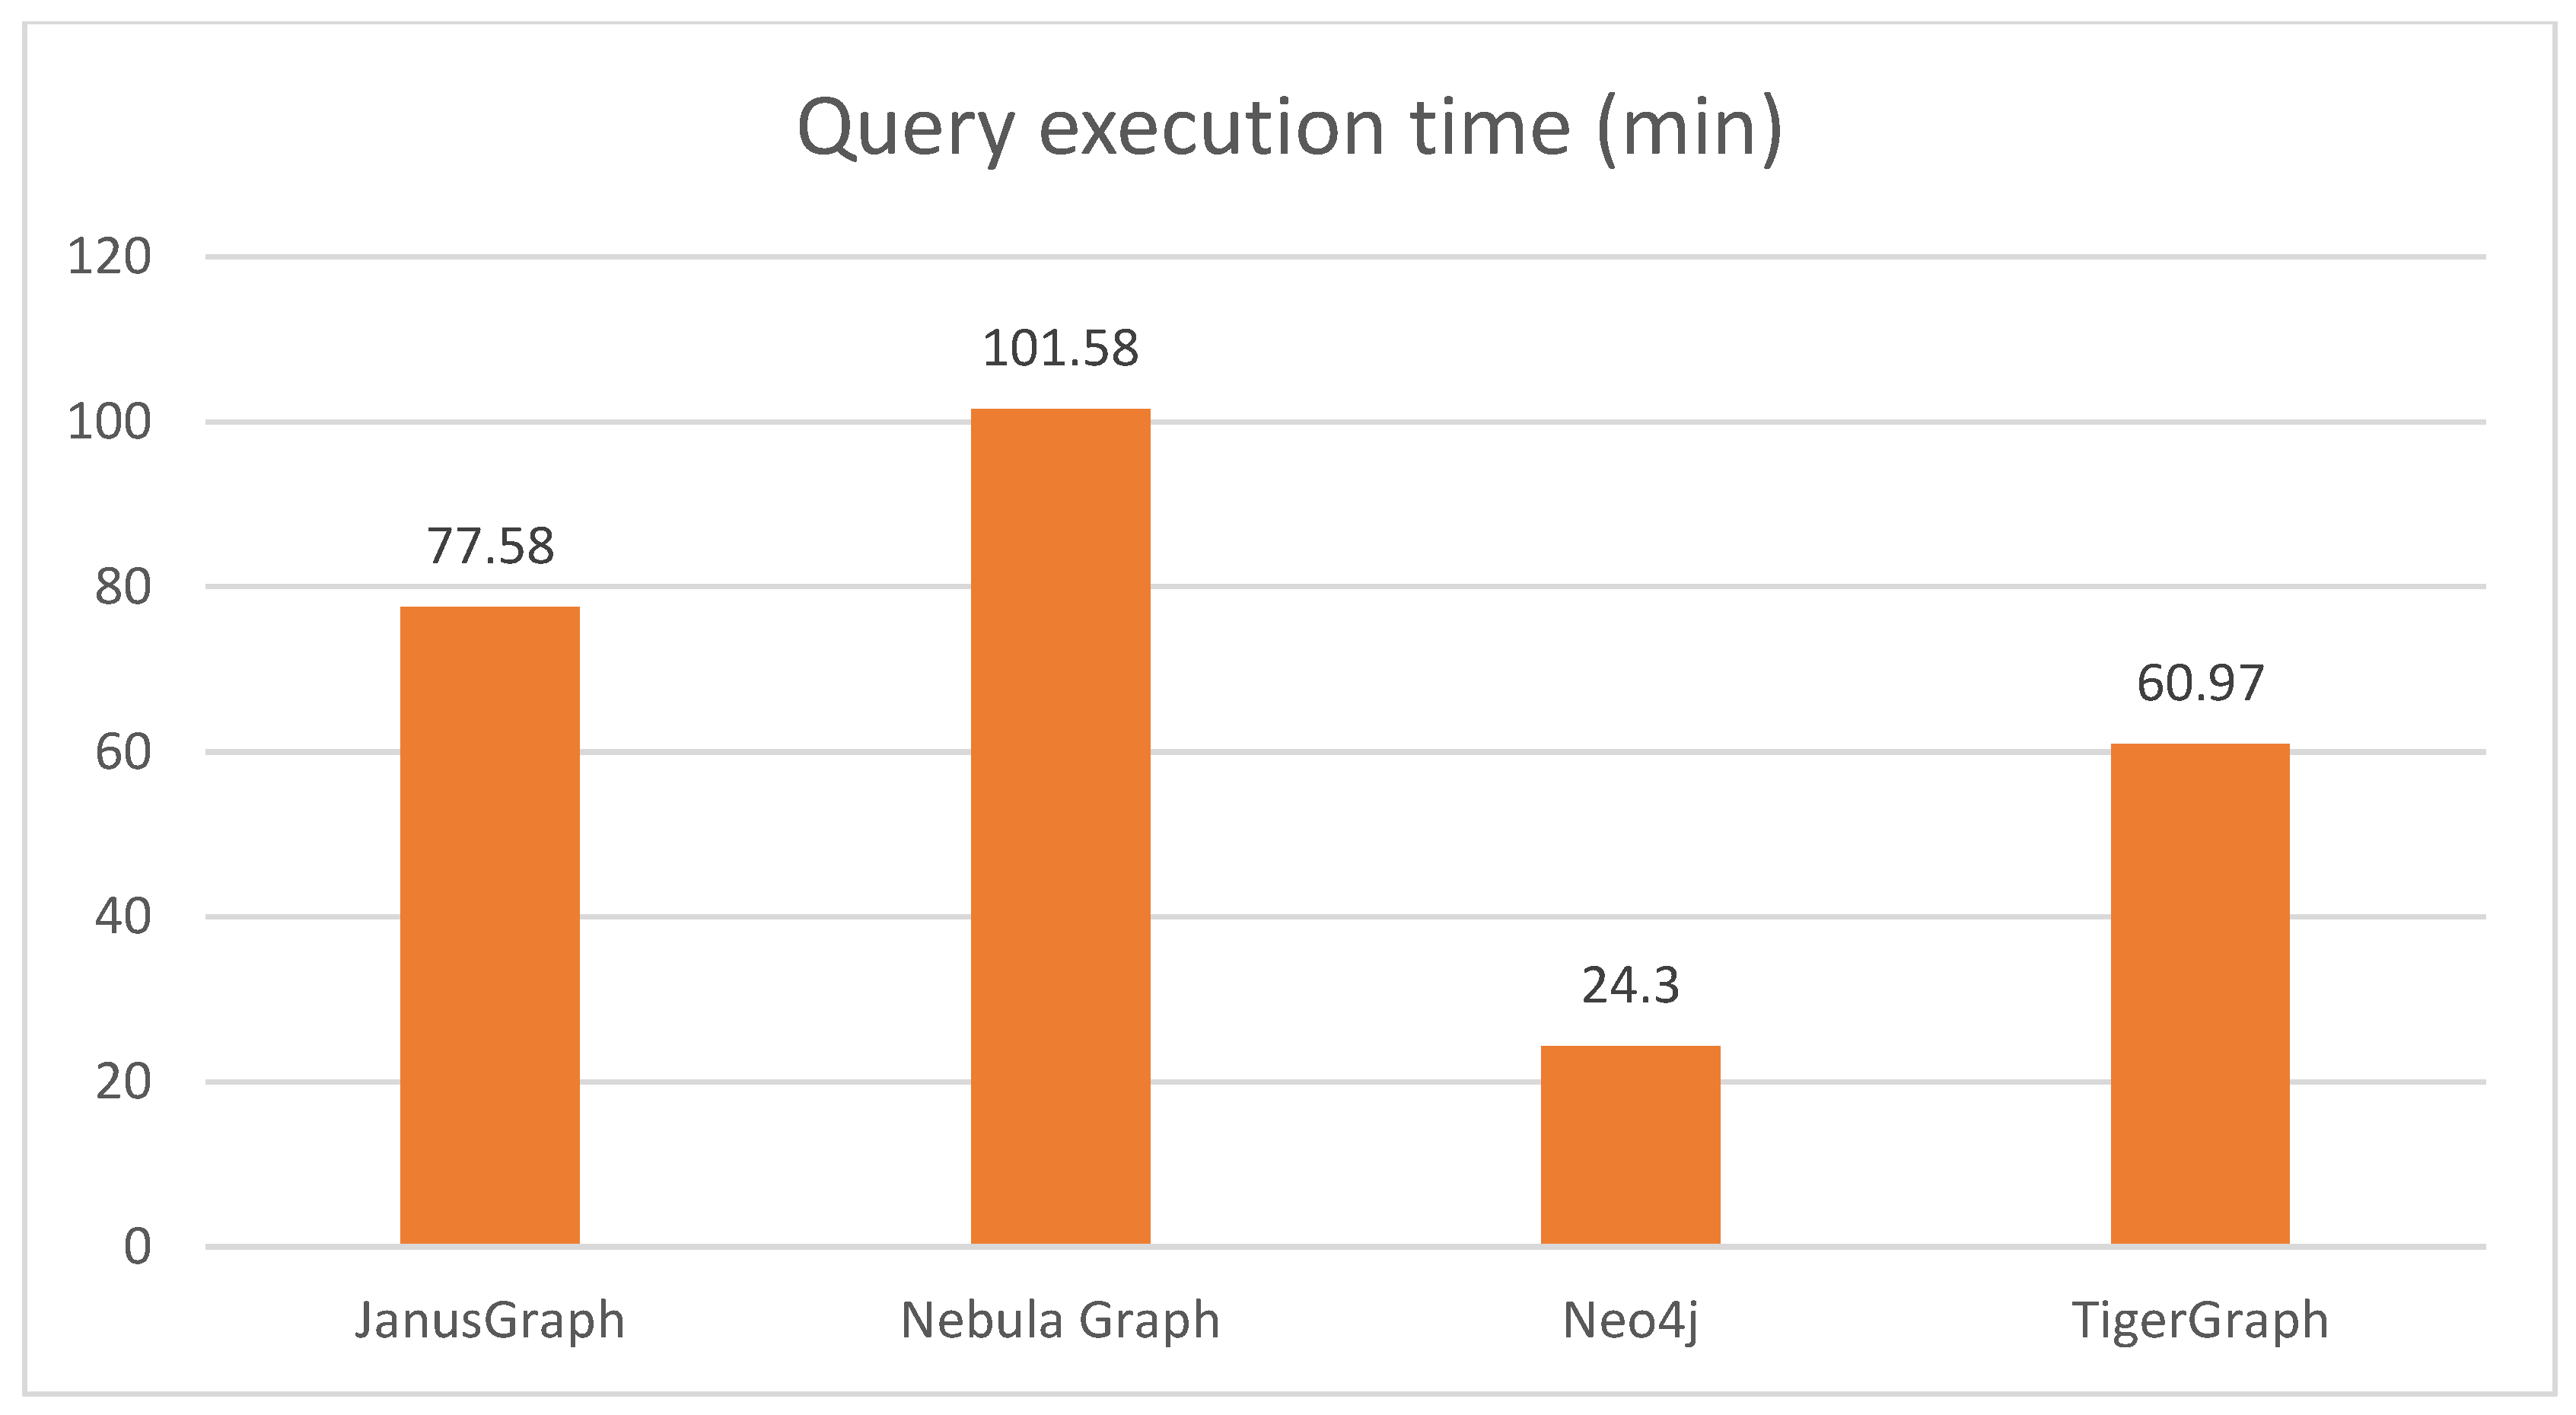

**Вывод**

Таким образом в качестве СУБД для хранения знаний была выбрана Neo4j, так как она обладает наибольшей скоростью выполнения запросов среди других графовых СУБД.

### Сравнение технологий разработки базы данных

Для выбора базы данных, возьмем к рассмотрению несколько самых популярных баз данных:

* PstgreSQL;
* MySQL;
* SQLite;
* Microsoft SQL;
* MongoDB;
* Redis.

---
Ниже приведено сравнение этих баз данных по скорости выполнения запросов [12]:

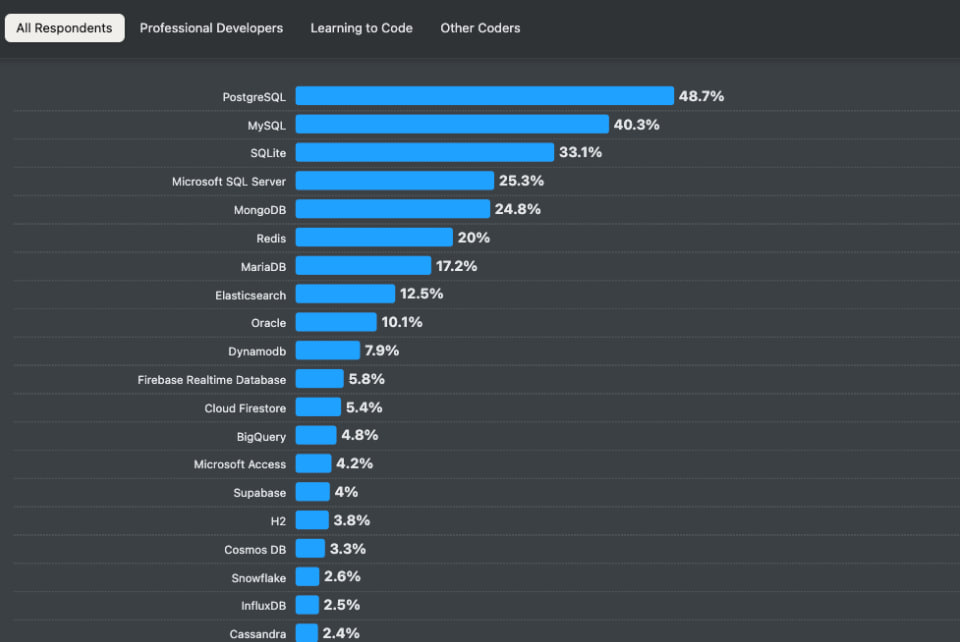


**Вывод:**  
Для серверной части экспертной системы в качестве базы данных оптимальным выбором является **PostgreSQL** по следующим причинам:
- у команды разработки имеется опыт работы с этой СУБД;
- она показывает наилучшие результаты по проивзодительности.


## Клиентская часть

Для веб-клиента стоит использовать Flutter, так как он обеспечивает высокую производительность и плавную работу интерфейса, а функция hot reload ускоряет прототипирование. Кроме того, обширная библиотека виджетов и наличие опыта разработки у команды упрощают создание современного и стабильного интерфейса [13].

# **Вывод**

Для решения задачи определения вида тремора у пациента была спроектирована клиент-серверная экспертная система, учитывающая специфику медицинской области и требования к объяснимости решений.

Выбор экспертной системы в сочетании с клиент-серверной архитектурой, использованием Flutter Web для интерфейса и Go + PostgreSQL для серверной части и базы данных позволяет создать:

* безопасную и надежную платформу для диагностики тремора;

* систему с объяснимыми решениями для врачей;

* гибкую и расширяемую архитектуру для дальнейшего развития и интеграции с другими медицинскими сервисами.

Ниже представлена диаграмма компонентов системы:


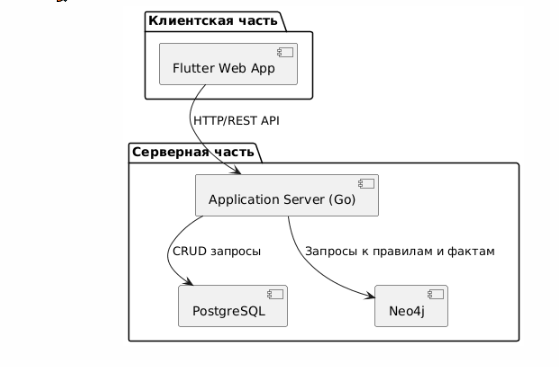

Таким образом, выбранная архитектура и технологии оптимально соответствуют целям проекта и требованиям медицинской области.

# Список использованных источников

1. Sung-Huai Hsieh 1, Sheau-Ling Hsieh, Po-Hsun Cheng, Feipei Lai. Электронная медицина и информационная система здравоохранения на основе сервис-ориентированной архитектуры // Telemedicine and e-Health. — 2012. — Т. 18, № 3. — С. 205–212. — DOI: 10.1089/tmj.2011.0100
2. Лиманова Н.И., Селезнев И.А. Анализ эффективности клиент-серверной архитектуры // Пovolzskiy State University of Telecommunications and Informatics. — Самара, Россия, 2020. — Дата обращения: 16.10.2025.
3. Луговская А.М., Жвакина А.В. Искусственные нейронные сети в медицинской диагностике // 54-я научная конференция аспирантов, магистрантов и студентов БГУИР. — Минск: Белорусский государственный университет информатики и радиоэлектроники, 2018. — С. 182.
4. Safonova A., Ghazaryan G., Stiller S., Main-Knorn M., Nendel C., Ryo M. Ten deep learning techniques to address small data problems with remote sensing // International Journal of Applied Geospatial Research. — 2023. — Article 103569. — DOI: 10.1016/j.jag.2023.103569.
5. Альзубайди Л., Бай Дж., Аль‑Сабаави А., Santamaría J., Альбахри А.С., Аль‑Даббаг Б.С.Н., Фадель М.А., Мануфали М., Чжан Ц., Аль‑Тимеми А.Х., Дуань Е., Абдулла А., Фархан Л., Лу Й., Гупта А., Албу Ф., Аббош А., Гу Ю. Обзор инструментов глубокого обучения для решения проблемы нехватки данных: определения, проблемы, решения, советы и примеры применения // Журнал больших данных. — 2023. — Т. 10. — Статья 46. — DOI: 10.1186/s40537-023-00623-1.
6. Christodoulou M., Malli F., Tsaras K., Billinis C., Papagiannis D. A Narrative Review of Q Fever in Europe // Cureus. — 2023. — Vol. — Article 38031. — DOI: 10.7759/cureus.38031. — PMID: 37228530. — PMCID: PMC10207987.
7. Architectural Review of Client-Server Models // International Journal of Scientific Research and Engineering Trends. — 2024. — Vol. 10, No. 1. — P. 139–143. — DOI: 10.47679/ijasca.v3i1.48. — Access mode: https://doi.org/10.47679/ijasca.v3i1.48
. — License: CC BY 4.0.
8. A review on client-server based applications and research opportunity // International Journal of Scientific Research. — 2019. — Vol. 10, No. 7(H). — P. 33857–33862. — DOI: 10.24327/ijrsr.2019.1007.3768. — Access mode: https://doi.org/10.24327/ijrsr.2019.1007.3768.
9. Дымора П., Пашкевич А. Анализ производительности выбранных языков программирования в контексте поддержки процессов принятия решений в рамках «Индустрии 4.0» // Прикладные науки. – 2020. – Т. 10, № 23. – С. 8521. – DOI: 10.3390/app10238521.
10. Запросы в эпоху графовых баз данных и графов знаний [Электронный ресурс] // arXiv preprint arXiv:2106.11456. — 2021. — DOI: 10.48550/arXiv.2106.11456
. — Режим доступа: https://arxiv.org/abs/2106.11456
 (дата обращения: 25.10.2025).
11. Монтейро, Дж., Са, Ф., Бернардино, Х.
Экспериментальная оценка графовых баз данных: JanusGraph, Nebula Graph, Neo4j и TigerGraph // Прикладные науки. – 2023. – Т. 13, № 9. – С. 5770. – DOI: 10.3390/app13095770.
12. Why PostgreSQL Remains the Top Choice for Developers in 2025 | Yugabyte
[Электронный ресурс]. – Режим доступа: https://www.yugabyte.com/blog/postgresql-top-choice-in-2025/
. – Дата доступа: 18.10.2025.
13. Simplilearn. Flutter vs Angular vs React: The Ultimate Showdown [Электронный ресурс]. – Режим доступа: https://www.simplilearn.com/flutter-vs-angular-vs-react-article
. – Дата доступа: 16.10.2025.